In [4]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Print the keys of the dataset
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). 

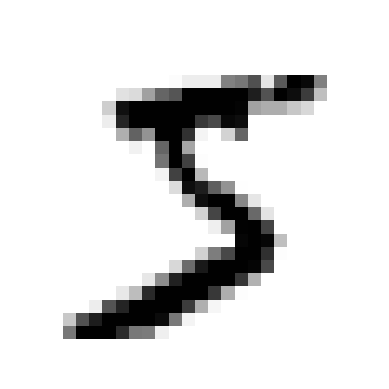

In [14]:
import matplotlib.pyplot as plt

# Select the first row of the DataFrame and store it in the variable 'some_digit'
some_digit = X.iloc[0]

# Convert the 'some_digit' Pandas Series to a NumPy array and reshape it to a 28x28 matrix
some_digit_image = some_digit.to_numpy().reshape(28, 28)

# Display the image using Matplotlib's imshow function
# Set the color map to "binary" (black and white)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [16]:
y[0]

'5'

Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to
integer:

In [18]:
import numpy as np

# Assuming 'y' is a variable you want to convert to uint8
y = y.astype(np.uint8)


In [19]:
y[0]

5

 The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)
The training set is already shuffled for us, which is good because this guarantees that
all cross-validation folds will be similar (you don’t want one fold to be missing some
digits). Moreover, some learning algorithms are sensitive to the order of the training
instances, and they perform poorly if they get many similar instances in a row. Shuf‐
fling the dataset ensures that this won’t ha
pShuffling may be a bad idea in some contexts—for example, if you are working on time series data (such as 
stock market prices or weather conditions).spen:

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


## Training a Binary Classifier